In [1]:
import glob
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import time

In [2]:
DataDir = 'ignore_folder/data'
Categories_all = ['a5df', 'a447', 'a440', 'a476', 'a67e', 'ae61', 
                  'a470', 'a448', 'a9d2', 'a44a', 'a5d0', 'a569', 
                  'acdb', 'a8e2', 'a558', 'a4ce', 'a4f1', 'a4e9', 
                  'a6ca', 'b773', 'ab42', 'a8e4', 'a4e8', 'ad78', 
                  'b944', 'a8c6', 'a6d1', 'a977', 'a57e', 'a8a3', 
                  'a4d2', 'a6b3', 'a8ad', 'a740', 'a8bd', 'a8ae', 
                  'a4a7', 'b3a3', 'a46c', 'a464', 'a656', 'a5fe', 
                  'a455', 'a5c1', 'a658', 'b3be', 'a45d', 'a9fa', 
                  'a46b', 'a9ce', 'a453', 'ac46', 'a454', 'b3bd', 
                  'a5c9', 'a650', 'a668', 'a5fd', 'a5d5', 'a5aa', 
                  'a5db', 'a7da', 'a5a6', 'a475', 'a5bf', 'adfb', 
                  'a474', 'a473', 'afe0', 'a8c3', 'a55b', 'bec7', 
                  'b54c', 'a6e7', 'a4ec', 'a4fb', 'a751', 'a56b', 
                  'b0a8', 'a4f4', 'a6e6', 'a4e2', 'a6e8', 'a4e5', 
                  'a4fd', 'bb50', 'ab48', 'a4c0', 'a4eb', 'b0aa', 
                  'a8e0', 'a6a8', 'a6db', 'bb44', 'b16f', 'a8d3', 
                  'a6b9', 'a540', 'a6d5', 'b0ea', 'aaf8', 'a8a7', 
                  'a4d1', 'a4bd', 'a6b8', 'b6c0', 'a4a3', 'a548', 
                  'a4a4', 'aaf7', 'b160', 'a6d3', 'aaf9', 'aacc', 
                  'a86b', 'aa47', 'a467', 'b1d0', 'a451', 'a45f', 
                  'a5ce', 'a457', 'adab', 'aa46', 'a46a']
IMG_X = 100
IMG_Y = 100

In [53]:
def create_training_data():
    """takes no arguments, accessess data in file and returns it as a list containing [0] category, 
    [1] class_type, [2] category + class_type, [3] horizontal average, [4] vertical average, 
    [5] the original image resized to be a 100 X 100 array"""
    data = []
    for category in Categories_all:
        path = os.path.join(DataDir, category)
        class_num = Categories_all.index(category)
        for img in os.listdir(path):
            if 'jinwen' in img:
                class_type = 'jinwen'
            if 'chuxi' in img:
                class_type = 'chuxi'
            if 'smallseal' in img:
                class_type = 'smallseal'
            if 'oracle' in img:
                class_type = 'oracle'
            try:
                img_array = cv2.imread(os.path.join(path,img), 
                                       cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_Y, IMG_X))
                horizontal_average = np.average(new_array, axis=1)
                vertical_average = np.average(new_array, axis=0)
                data.append([category, class_type, category + "-" + class_type, 
                             horizontal_average, vertical_average, new_array])
            except Exception as e:
                print('something went wrong')
    return data

In [54]:
complete_data = create_training_data()

In [55]:
def shuffle(data):
    """takes a list of data as an input and outputs a shuffled list 
    with 100 testing data elements and the rest as training data"""
    random.shuffle(data)
    testing_data = data[-100:]
    training_data = data[0:-100]
    return data, testing_data, training_data

In [56]:
shuffled_data, testing_data, training_data = shuffle(complete_data)

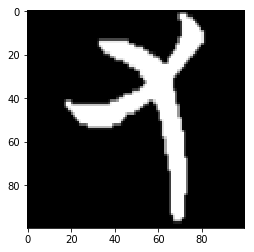

In [57]:
plt.imshow(shuffled_data[0][-1], cmap='gray')